Regresión polinómica

In [1]:
import pandas
import statsmodels.formula.api as smf
dataset = pandas.read_csv("doggy-illness.csv", delimiter="\t")
print(dataset)

#Simple linear regression (starting point)
simple_formula = "core_temperature ~ protein_content_of_last_meal"
simple_model = smf.ols(formula = simple_formula, data = dataset).fit()
print("R-squared:", simple_model.rsquared)

    male  attended_training  age  body_fat_percentage  core_temperature  \
0      0                  1  6.9                   38         38.423169   
1      0                  1  5.4                   32         39.015998   
2      1                  1  5.4                   12         39.148341   
3      1                  0  4.8                   23         39.060049   
4      1                  0  4.8                   15         38.655439   
..   ...                ...  ...                  ...               ...   
93     0                  0  4.5                   38         37.939942   
94     1                  0  1.8                   11         38.790426   
95     0                  0  6.6                   20         39.489962   
96     0                  0  6.9                   32         38.575742   
97     1                  1  6.0                   21         39.766447   

    ate_at_tonys_steakhouse  needed_intensive_care  \
0                         0                  

slope: 0.1283
y-intercept: 37.2094
so...
 f(x) = 0.1283x + 37.2094


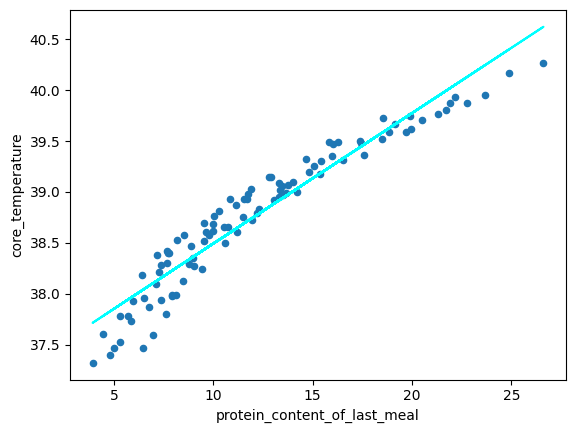

In [2]:
from scipy import stats
from matplotlib import pyplot as plt
df_regression = dataset[['protein_content_of_last_meal', 'core_temperature']].copy()
# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['protein_content_of_last_meal'], df_regression['core_temperature'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))
# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['protein_content_of_last_meal']) + b
# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='protein_content_of_last_meal', y='core_temperature')
# Plot the regression line
plt.plot(df_regression['protein_content_of_last_meal'],df_regression['fx'], color='cyan')
# Display the plot
plt.show()

Simple Polynomial Regression

-0.004358035477022835
0.2499299742425133
36.492045722876796
R-squared: 0.9514426069911689
    protein_content_of_last_meal  core_temperature
61                         26.61         40.264878
50                         24.89         40.173379
52                         23.65         39.955729
19                         22.18         39.934051
87                         22.78         39.872334
..                           ...               ...
45                          5.33         37.520979
84                          6.45         37.468125
63                          4.99         37.466068
22                          4.83         37.398927
70                          3.93         37.321134

[98 rows x 2 columns]
61    40.056792
50    40.012947
52    39.965342
19    39.891547
87    39.923942
        ...    
45    37.700365
84    37.922789
63    37.630681
22    37.597539
70    37.406961
Name: fx, Length: 98, dtype: float64


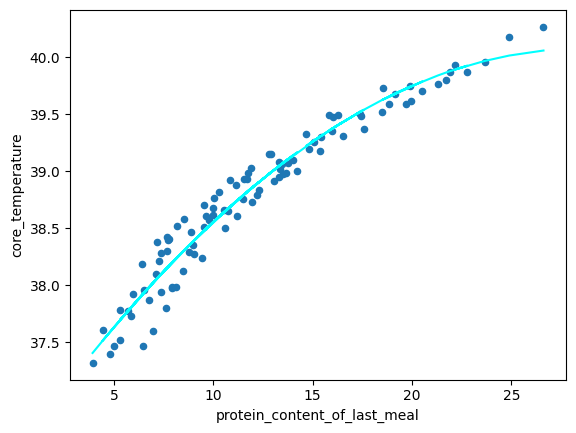

In [3]:
# Perform polynomial regression. This method takes care of
# the entire fitting procedure for us.
polynomial_formula = "core_temperature ~ protein_content_of_last_meal + I(protein_content_of_last_meal**2)"
polynomial_model = smf.ols(formula = polynomial_formula, data = dataset).fit()
a=polynomial_model.params[2]
b=polynomial_model.params[1]
c=polynomial_model.params[0]
print(a)
print(b)
print(c)
print("R-squared:", polynomial_model.rsquared)
from scipy import stats
from matplotlib import pyplot as plt
df_regression = dataset[['protein_content_of_last_meal', 'core_temperature']].copy()
df_regression = df_regression.sort_values('core_temperature', ascending=False)
print(df_regression)
# Use the function to calculate f(x) for each x value
x=df_regression['protein_content_of_last_meal']
df_regression['fx'] = a*x*x + b*x +c
print(df_regression['fx'])
# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='protein_content_of_last_meal', y='core_temperature')
# Plot the regression line
plt.plot(df_regression['protein_content_of_last_meal'],df_regression['fx'], color='cyan')
# Display the plot
plt.show()

[ 3.93 26.61]
[ 15.4449 708.0921]
[[37.4069611  43.07537292]
 [34.38838003 40.05679184]]


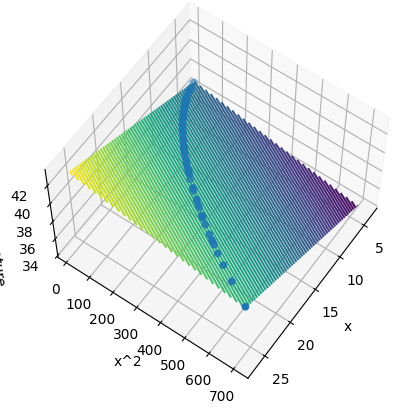

In [4]:
#3D CHART
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
xdata=np.array([min(dataset.protein_content_of_last_meal), max(dataset.protein_content_of_last_meal)])
print(xdata)
ydata=np.array([min(dataset.protein_content_of_last_meal)**2, max(dataset.protein_content_of_last_meal)**2])
print(ydata)
X, Y = np.meshgrid(xdata, ydata)
Z=a*Y + b*X + c
print(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z,100, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('x^2')
ax.set_zlabel('Core temperature')
ax.view_init(60, 35)
ax.scatter(df_regression['protein_content_of_last_meal'],df_regression['protein_content_of_last_meal']**2,df_regression['core_temperature'])

Extrapolating

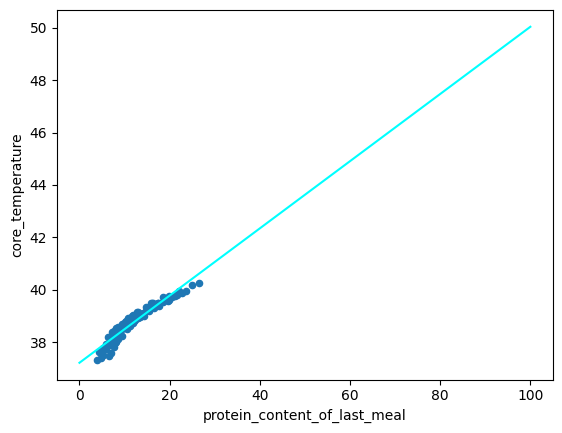

In [5]:
#Linear regression
from scipy import stats
from matplotlib import pyplot as plt
df_regression = dataset[['protein_content_of_last_meal', 'core_temperature']].copy()
# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['protein_content_of_last_meal'], df_regression['core_temperature'])
# Use the function (mx + b) to calculate f(x) for [0,100]
list = np.arange(0,100+1)
fx = (m * list) + b
# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='protein_content_of_last_meal', y='core_temperature')
# Plot the regression line
plt.plot(list,fx, color='cyan')
# Display the plot
plt.show()

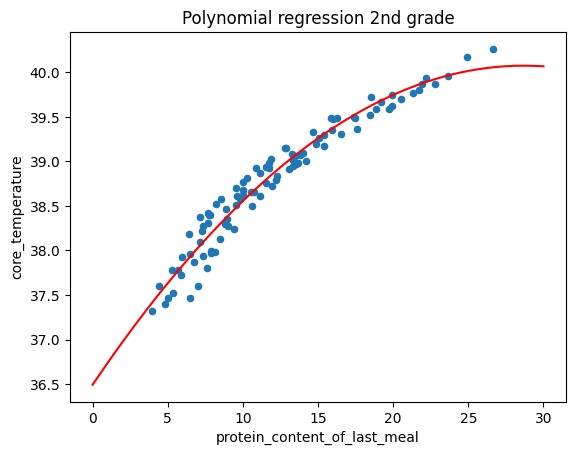

In [26]:
import numpy as np
import matplotlib.pyplot as plt
#Polynomial regression
# Use the function to calculate f(x) for each x value
coefficients = [-0.004358, 0.24992, 36.49204]
#Coefficients for the polynomial 5x^3 - 3x^2 + 2x - 1
polynomial = np.poly1d(coefficients)
x = np.linspace(0, 30, 400) # 400 points between 0 and 10
y = polynomial(x)
df_regression.plot.scatter(x='protein_content_of_last_meal', y='core_temperature')
plt.plot(x, y,color='red')
plt.title('Polynomial regression 2nd grade')
plt.xlabel('protein_content_of_last_meal')
plt.ylabel('core_temperature')
plt.grid(False)
plt.show()
# Create a scatter plot of Grade vs StudyHours
#df_regression.plt(x='protein_content_of_last_meal', y='core_temperature')
# Plot the regression line
# Display the plot